In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\yashw\Desktop\titanic-eda\data\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.info()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 118.9 KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

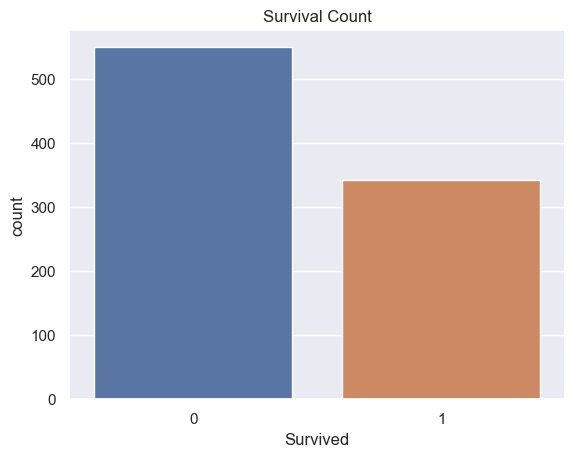

In [29]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [30]:
print("Shape:", df.shape)
df.describe()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# Check missing values again
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create HasCabin feature (instead of dropping)
df['HasCabin'] = df['Cabin'].notna().astype(int)

# Drop Cabin column (too many missing)
df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

C:\Users\yashw\AppData\Local\Temp\ipykernel_15252\2180477289.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\yashw\AppData\Local\Temp\ipykernel_15252\2180477289.py:5: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignme

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
HasCabin         0
dtype: int64

In [33]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Alone or not
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [34]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Mme               1
Ms                1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [35]:
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [36]:
df['Survived'].mean() * 100

38.38383838383838

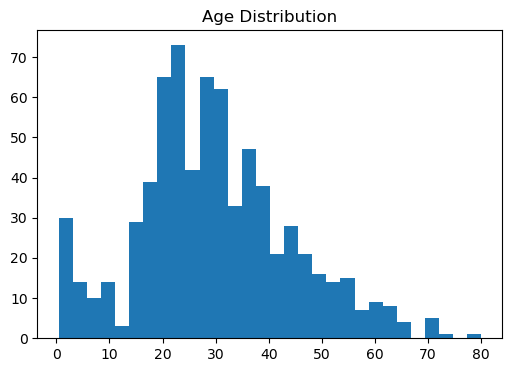

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=30)
plt.title("Age Distribution")
plt.show()

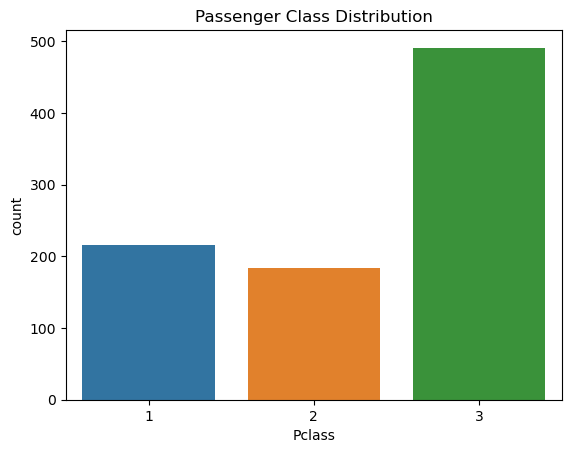

In [8]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

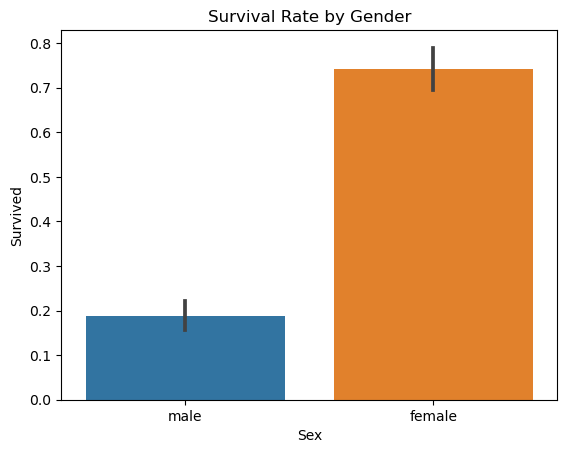

In [9]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

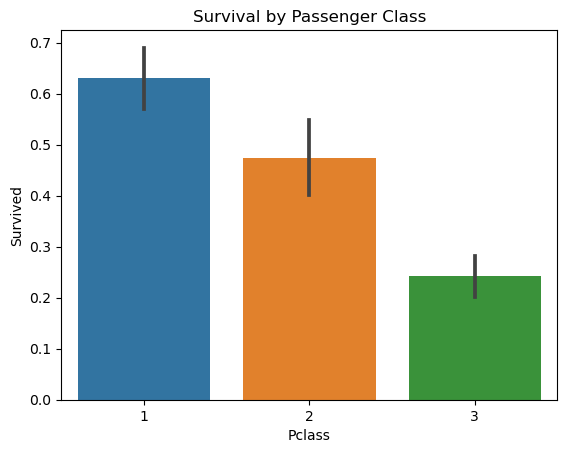

In [10]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

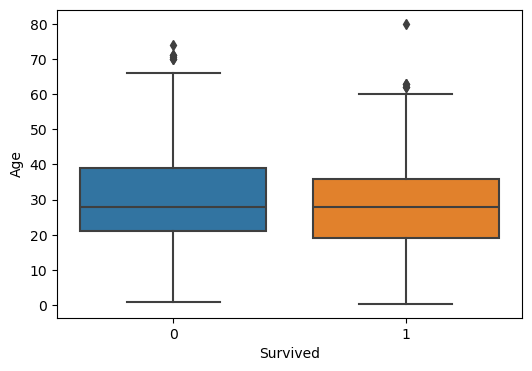

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

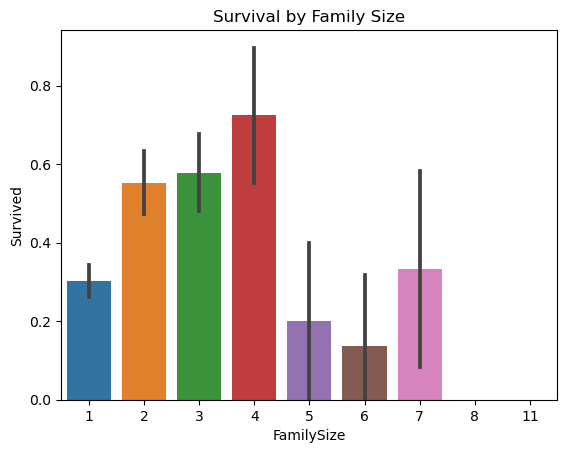

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

In [21]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [23]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

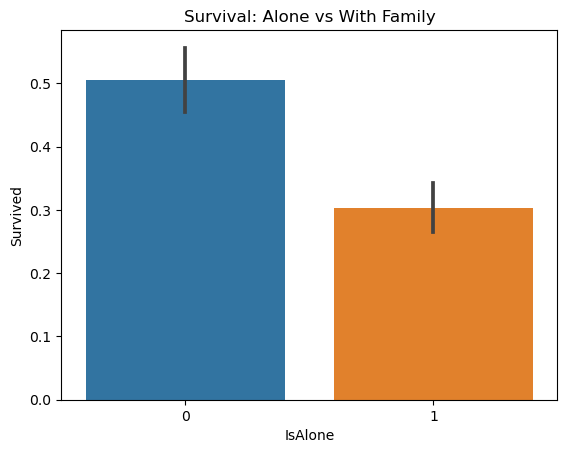

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival: Alone vs With Family")
plt.show()

In [26]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
df['Title'] = df['Title'].replace([
    'Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'
], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

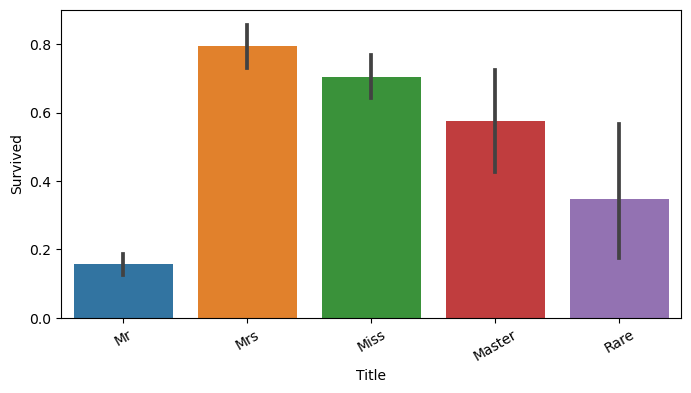

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=30)
plt.show()

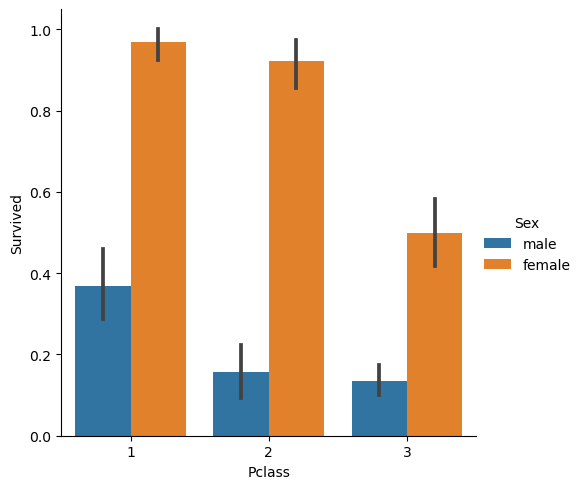

In [29]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.show()

## Final Insights

- Overall survival rate ≈ 38%
- Women had much higher survival chances than men
- First-class passengers survived more than third-class
- Passengers traveling alone had lower survival rates
- Children and higher social status individuals had better chances

These patterns reflect the "women and children first" policy and the advantage of higher socioeconomic status.

In [31]:
import os
os.getcwd()

'C:\\Users\\yashw'

In [34]:
import os

path = r"C:\Users\yashw\Desktop\titanic-eda\data"

os.makedirs(path, exist_ok=True)
df.to_csv(path + r"\titanic_cleaned.csv", index=False)

print("Saved at:", path + r"\titanic_cleaned.csv")

Saved at: C:\Users\yashw\Desktop\titanic-eda\data\titanic_cleaned.csv


In [35]:
import os
os.getcwd()

'C:\\Users\\yashw'